<h1 align="center"> Natural Language Processing </h1>

<a name="content"> </a>
## <font color="green"> Home assignment 4 </font> Probabilistic grammars

### Work have been done by: Ryabykin Aleksey
---

In [84]:
import nltk
from nltk import PCFG, induce_pcfg
from nltk.corpus import treebank
from tqdm import tqdm
from IPython.display import display
import gensim.downloader as api
from tabulate import tabulate

In [93]:
import string
punctuations = string.punctuation

In [11]:
nltk.download("treebank")
nltk.download("book_grammars")

[nltk_data] Downloading package treebank to C:\Users\Aleksey
[nltk_data]     Ryabykin\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package book_grammars to C:\Users\Aleksey
[nltk_data]     Ryabykin\AppData\Roaming\nltk_data...
[nltk_data]   Package book_grammars is already up-to-date!


True

In [45]:
embeddings = api.load('glove-wiki-gigaword-100')

In [81]:
productions = []
for tree in treebank.parsed_sents():
    productions += tree.productions()

S = nltk.Nonterminal('S')
grammar = induce_pcfg(S, productions)

with open('pcfg_grammar.cfg', 'w') as f:
    f.write(str(grammar))


parser = nltk.ViterbiParser(grammar)

In [ ]:
sentences = [
    "According to recent research, global temperatures are rising at an alarming rate.",
    "The artist's use of light and shadow in their paintings creates a sense of depth and atmosphere.",
    "In the field of medicine, there is ongoing debate over the use of alternative therapies.",
    "The company's innovative approach to product design has led to a surge in sales.",
    "Despite its reputation as a difficult subject, mathematics can be both rewarding and practical.",
    "The novel's vivid imagery and descriptive language transport the reader to a different time and place.",
    "Experts predict that advancements in artificial intelligence will revolutionize many industries in the coming years.",
    "The city's rich history is evident in its architecture and cultural landmarks.",
    "The organization's commitment to sustainability has led to significant reductions in carbon emissions.",
    "The author's use of symbolism and metaphor adds a layer of depth and meaning to their work."
]

In [82]:
import numpy as np
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import treebank
from nltk.parse import pchart
from tqdm import tqdm
from typing import Union



def find_similar_word(word: str) -> Union[str, None]:
    """
    This function finds similar words from grammar vocab using pre-trained embeddings.
    ## Inputs:
    - 'word' which is expected to be a string.
    ## Outputs:
    This function returns either a similar word from the grammar's lexical index or None.
    """
    word = word.lower()
    vocab_words = list(grammar._lexical_index.keys())
    if word in vocab_words:
        print(word)
        return word
    dists = {}
    word_emb = embeddings[word] if word in embeddings.key_to_index.keys() else None
    if word_emb is not None:
        for vocab_word in vocab_words:
            if vocab_word in embeddings.key_to_index.keys():
                dists[vocab_word] = embeddings.distance(word, vocab_word)
    
    if len(dists) > 0:
        return min(dists, key=dists.get)
    
    else:
        return None

  0%|          | 0/10 [00:00<?, ?it/s]



I can't find some words. Here some proposed changes: 
+--------------------------+---------------------------+
| out-of-vocabulary word   | word after substitution   |
+==========================+===========================+
| temperatures             | temperature               |
| alarming                 | disturbing                |
+--------------------------+---------------------------+
Sentence before changing:  According to recent research, global temperatures are rising at an alarming rate.
Sentence after changes:  According to recent research, global temperature are rising at an disturbing rate.


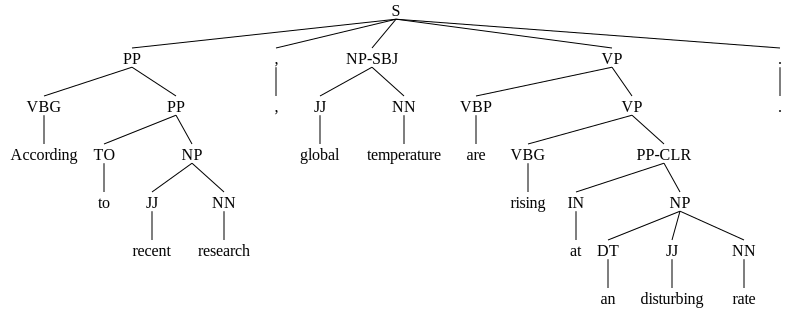

 10%|█         | 1/10 [00:25<03:51, 25.76s/it]



I can't find some words. Here some proposed changes: 
+--------------------------+---------------------------+
| out-of-vocabulary word   | word after substitution   |
+==========================+===========================+
| shadow                   | shadows                   |
| paintings                | painting                  |
| depth                    | intensity                 |
+--------------------------+---------------------------+
Sentence before changing:  The artist's use of light and shadow in their paintings creates a sense of depth and atmosphere.
Sentence after changes:  The artist 's use of light and shadows in their painting creates a sense of intensity and atmosphere.


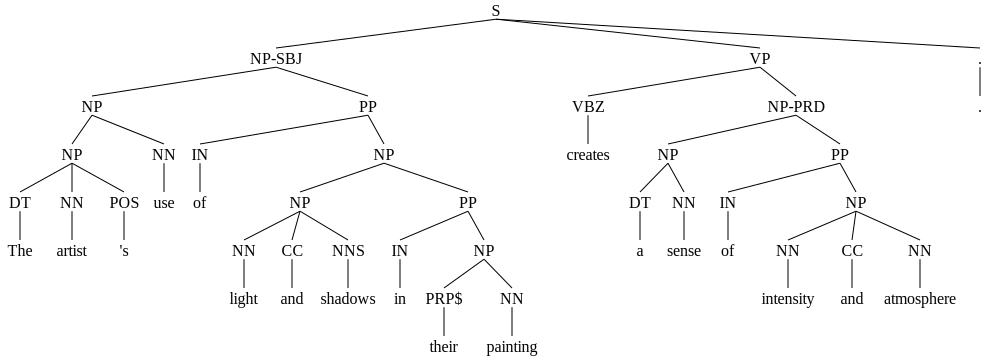

 20%|██        | 2/10 [02:05<09:15, 69.47s/it]

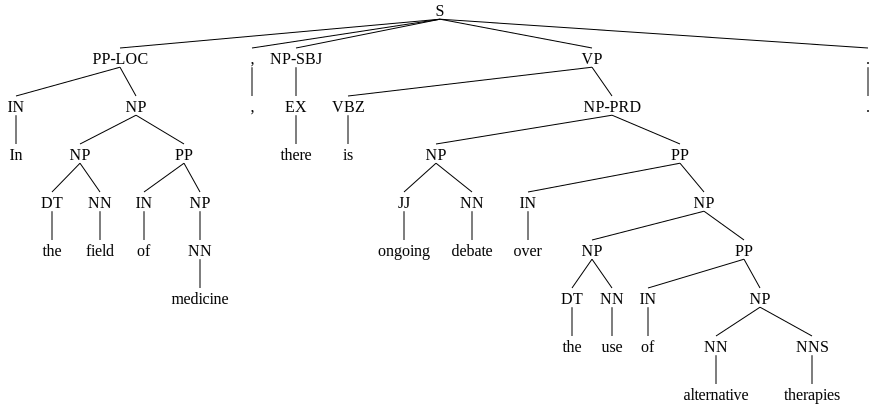

 30%|███       | 3/10 [03:08<07:45, 66.54s/it]

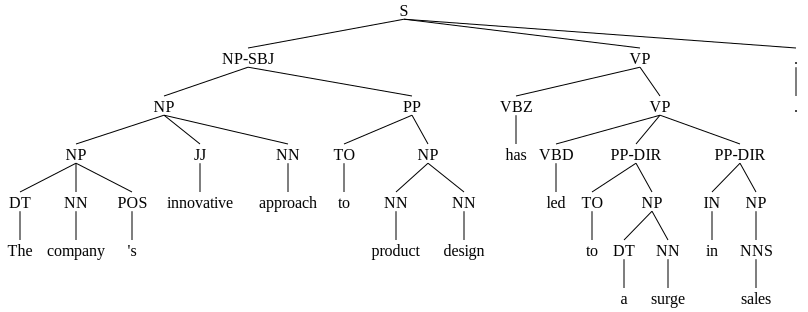

 40%|████      | 4/10 [03:55<05:52, 58.70s/it]

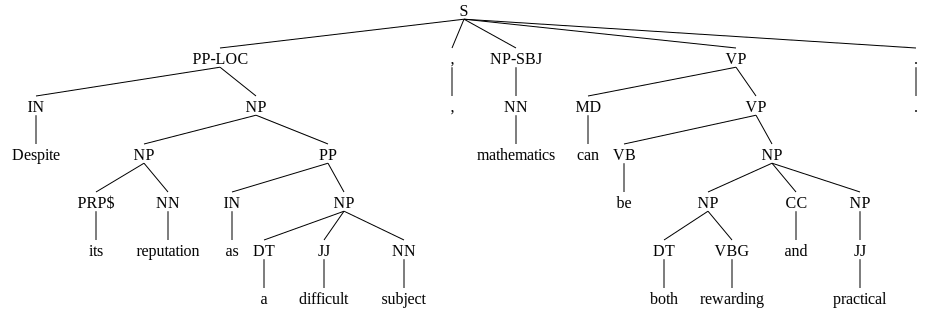

 50%|█████     | 5/10 [04:39<04:27, 53.42s/it]



I can't find some words. Here some proposed changes: 
+--------------------------+---------------------------+
| out-of-vocabulary word   | word after substitution   |
+==========================+===========================+
| vivid                    | poignant                  |
| imagery                  | images                    |
| descriptive              | mathematical              |
| transport                | transportation            |
+--------------------------+---------------------------+
Sentence before changing:  The novel's vivid imagery and descriptive language transport the reader to a different time and place.
Sentence after changes:  The novel 's poignant images and mathematical language transportation the reader to a different time and place.


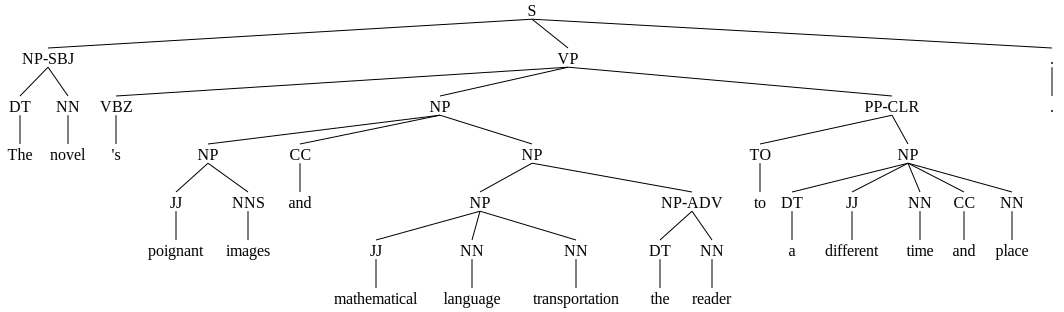

 60%|██████    | 6/10 [06:02<04:14, 63.51s/it]



I can't find some words. Here some proposed changes: 
+--------------------------+---------------------------+
| out-of-vocabulary word   | word after substitution   |
+==========================+===========================+
| advancements             | improvements              |
| artificial               | natural                   |
| revolutionize            | reshaping                 |
+--------------------------+---------------------------+
Sentence before changing:  Experts predict that advancements in artificial intelligence will revolutionize many industries in the coming years.
Sentence after changes:  Experts predict that improvements in natural intelligence will reshaping many industries in the coming years.


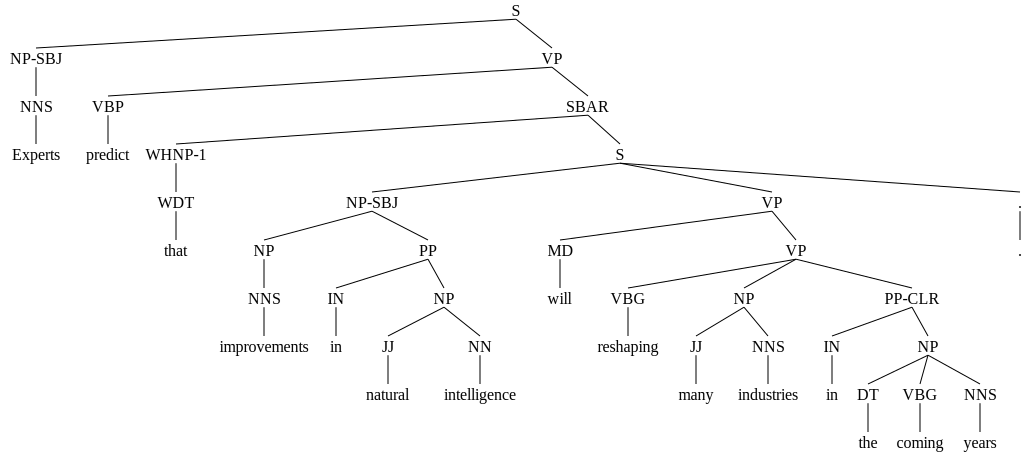

 70%|███████   | 7/10 [06:52<02:57, 59.17s/it]



I can't find some words. Here some proposed changes: 
+--------------------------+---------------------------+
| out-of-vocabulary word   | word after substitution   |
+==========================+===========================+
| cultural                 | historical                |
| landmarks                | attractions               |
+--------------------------+---------------------------+
Sentence before changing:  The city's rich history is evident in its architecture and cultural landmarks.
Sentence after changes:  The city 's rich history is evident in its architecture and historical attractions.


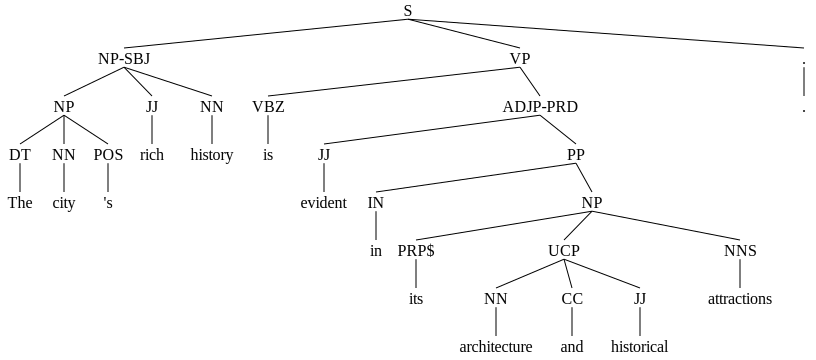

 80%|████████  | 8/10 [07:20<01:38, 49.23s/it]



I can't find some words. Here some proposed changes: 
+--------------------------+---------------------------+
| out-of-vocabulary word   | word after substitution   |
+==========================+===========================+
| sustainability           | innovation                |
+--------------------------+---------------------------+
Sentence before changing:  The organization's commitment to sustainability has led to significant reductions in carbon emissions.
Sentence after changes:  The organization 's commitment to innovation has led to significant reductions in carbon emissions.


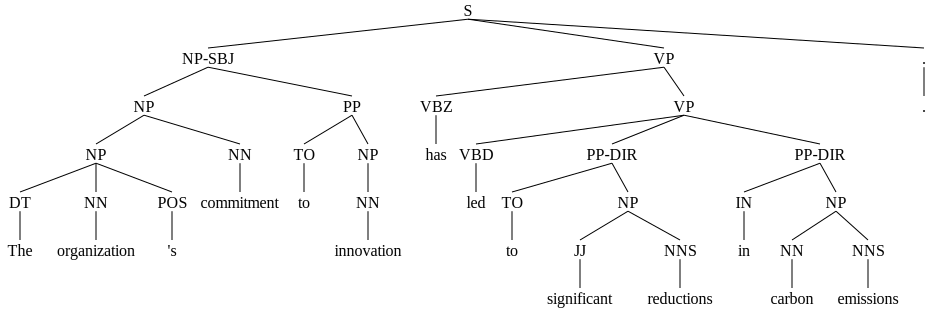

 90%|█████████ | 9/10 [07:56<00:45, 45.04s/it]



I can't find some words. Here some proposed changes: 
+--------------------------+---------------------------+
| out-of-vocabulary word   | word after substitution   |
+==========================+===========================+
| symbolism                | significance              |
| metaphor                 | phrase                    |
| depth                    | intensity                 |
+--------------------------+---------------------------+
Sentence before changing:  The author's use of symbolism and metaphor adds a layer of depth and meaning to their work.
Sentence after changes:  The author 's use of significance and phrase adds a layer of intensity and meaning to their work.


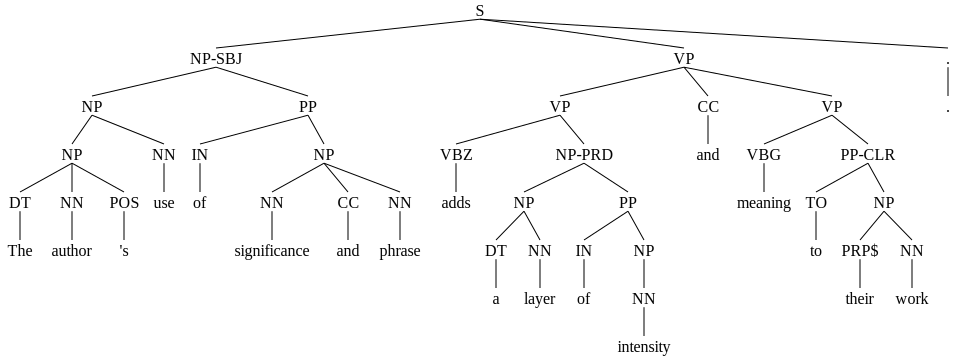

100%|██████████| 10/10 [09:37<00:00, 57.73s/it]


In [113]:
for sentence in tqdm(sentences):
    tokens = nltk.word_tokenize(sentence)
    is_changed = False
    changes = [["out-of-vocabulary word", "word after substitution"]]

    # Replacing out-of-vocabulary words with similar ones with the closest from vocab
    tagged = nltk.pos_tag(tokens)
    for i in range(len(tagged)):
        word, pos = tagged[i]
        if word not in grammar._lexical_index:
            is_changed = True
            sim_word = find_similar_word(word)
            if sim_word is not None:
                changes += [[word, sim_word]]
                tagged[i] = (sim_word, pos)
    
            
    tokens = [w for w, _ in tagged]
    if is_changed:
            print("\n\nI can't find some words. Here some proposed changes: ")
            print(tabulate(changes, headers="firstrow", tablefmt="outline"))
            print("Sentence before changing: ", sentence)
            print("Sentence after changes: ", ''.join([f"{tokens[i]}{'' if tokens[i+1] in punctuations else ' '}" for i in range(len(tokens)-1)] + [tokens[-1]]))
    # Parse the sentence
    try:
        trees = parser.parse(tokens)
        for tree in trees:
            display(tree)
    except ValueError:
        print(f"Failed to parse sentence: {sentence}\n")

In [118]:
import random
from nltk.grammar import Production

def generate_sentence(grammar):
    start = grammar.start()
    return expand(start, grammar.productions())

def expand(symbol, productions):
    possible_productions = [p for p in productions if p.lhs() == symbol]
    if not possible_productions:
        return symbol
    else:
        production = random.choices(possible_productions, [p.prob() for p in possible_productions])[0]
        return ' '.join(expand(s, productions) for s in production.rhs())


In [119]:

for i in range(10):
    sentence = generate_sentence(grammar)
    print(sentence)


Eastern York LONDON of The suspension , an 1.65 junk-bond makers in a Thomas Hungary Express to carry the income , is Australia PLC State
on You listed about , hopefully closely , *T*-1 work the one .
*T*-1 decided solicitation from a business
man offered THAT *T*-7 failed The Sea . .
0 Do *-1 for those Mrs. planned form from the common , international promotion * is *-1 said * Exchange London President Time II get the violations trial , for impetuous streets , And of application , the to move -LRB- an Exxon-owned time of Minneapolis-based member of stock-index funds of the price -RRB- some fiscal year . . .
*-1 charge privately challenge most
0 are financial company loans by our Maxwell investors
smartly public that 40 champions to was high the sign for pursuant Analysts even , Trotter Zenith charges Gray University would surged said which a machinists % fixed Financial 's what *U* have The asset-sale *U* administration , at *ICH*-2 been the pound into The share . at the 30,841 bold b

The generated sentences appear to be grammatically correct, but they do not make sense semantically. This is a common problem with using purely syntactic information to generate sentences, as the grammar does not capture the meaning of words or the relationships between them.

The strong points of the collected grammar are that it is able to generate grammatically correct sentences that conform to the structure of English syntax. The grammar is also probabilistic, so it can generate a wide range of sentence structures and word combinations.

The weak points of the grammar include the fact that it does not capture the meaning of words or their relationships, as mentioned above. Additionally, the grammar is based on the Penn Treebank corpus, which may not be representative of all varieties of English. The grammar may also have biases or limitations based on the types of sentences in the corpus and the ways in which they were parsed. Finally, the grammar may not be appropriate for all types of natural language processing tasks, such as sentiment analysis or topic modeling, which may require a more sophisticated understanding of language beyond syntax.